# Customer Segmentation with K-Means

In this notebook, we analyze customer data from the Kaggle dataset "Mall Customers".  
The goal is to identify customer segments using the K-Means algorithm.  
We start with two features (Annual Income & Spending Score) and then extend to three features (Age, Income, Spending Score).


## Step 1: Import Libraries
We import the necessary libraries for data analysis, visualization, and clustering.


In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator

## Step 2: Load the dataset
We load the Kaggle dataset "Mall_Customers.csv" and check the first few rows.



In [407]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 3: Check Data Quality
Check for missing values and duplicates, and display basic statistics.




In [408]:
# control Dataset for NaNs und Duplicates 
print(df.isna().sum())
print(df.duplicated().sum())
# Standard Statistics 
df.describe()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
0


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Step 4: Prepare 2D Data
We use only **Annual Income** and **Spending Score** for the initial analysis.


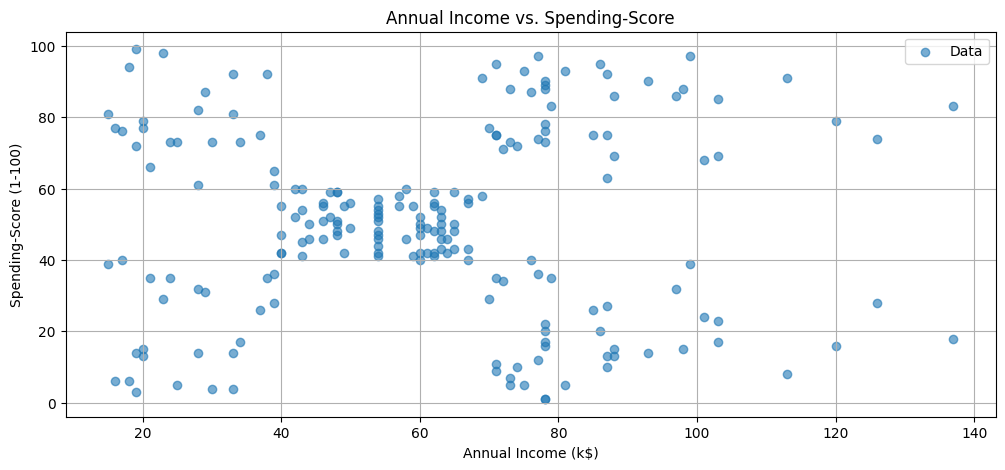

In [409]:
# Visualization

fig = plt.figure(figsize=(12,5))
data_2d = df.drop(columns=['CustomerID','Gender','Age'])
data_2d = np.array(data_2d)
plt.title('Annual Income vs. Spending-Score')
plt.scatter(data_2d[:,0],data_2d[:,1],label='Data',alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending-Score (1-100)')
plt.grid(True)
plt.legend()
plt.show()

## Step 5: Determine Optimal Number of Clusters (2D)
We use **Elbow Method** (Inertia) and **Silhouette Score** to find the best `k`.


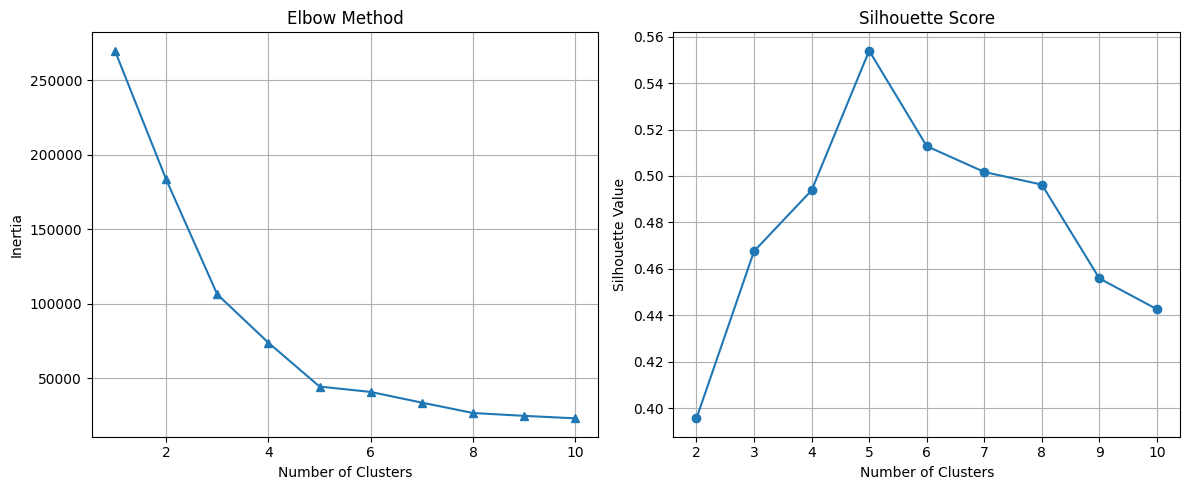

Elbow Method suggests k = 5
Silhouette Score suggests best k = 5


In [410]:
inertia_scores = []
silhouette_scores = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42, init='k-means++')
    km.fit(data_2d)
    inertia_scores.append(km.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(data_2d, km.labels_))

# Plot Inertia and Silhouette
fig, axs = plt.subplots(1,2, figsize=(12,5))

# Elbow Method
axs[0].plot(range(1,11), inertia_scores, marker='^')
axs[0].set_title('Elbow Method')
axs[0].set_xlabel('Number of Clusters')
axs[0].set_ylabel('Inertia')
axs[0].grid(True)

# Silhouette
axs[1].plot(range(2,11), silhouette_scores, marker='o')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of Clusters')
axs[1].set_ylabel('Silhouette Value')
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Compute Elbow and Best Silhouette
knee = KneeLocator(range(1,11), inertia_scores, curve='convex', direction='decreasing')
best_silhouette = list(zip(silhouette_scores, range(2,11)))
best_silhouette_k = best_silhouette[silhouette_scores.index(max(silhouette_scores))][1]

print(f"Elbow Method suggests k = {knee.elbow}")
print(f"Silhouette Score suggests best k = {best_silhouette_k}")


**Result:**  
- Optimal number of clusters for 2D data: **k = 5**



We apply KMeans with k=5 and visualize the clusters with different colors.


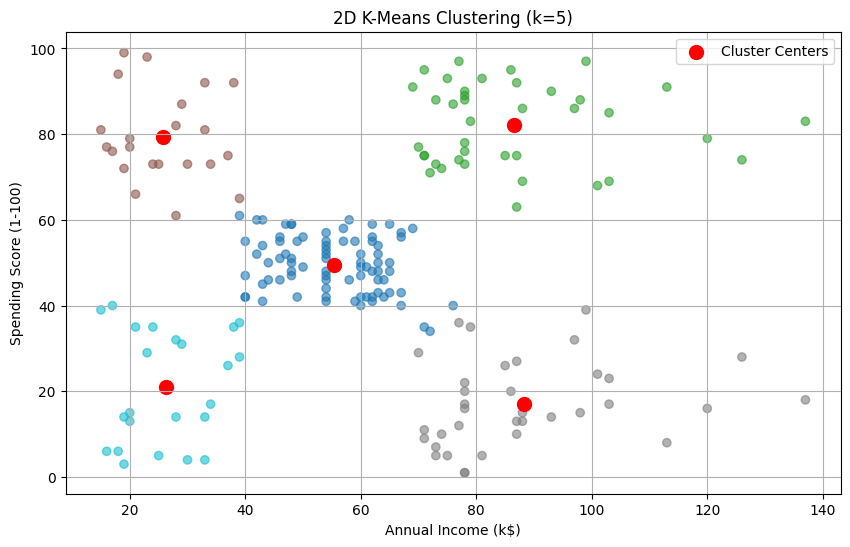

In [411]:
# The best K for our Dataset is K = 5, so we are going to use  5 clusters und scatter our Data with the Diffrent colors
# Apply KMeans for 2D clustering
km_2d = KMeans(n_clusters=5, random_state=42).fit(data_2d)

plt.figure(figsize=(10,6))
plt.scatter(data_2d[:,0], data_2d[:,1], c=km_2d.labels_, cmap='tab10', alpha=0.6)
plt.scatter(km_2d.cluster_centers_[:,0], km_2d.cluster_centers_[:,1], color='red', s=100, label='Cluster Centers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('2D K-Means Clustering (k=5)')
plt.legend()
plt.grid(True)
plt.show()


## Step 6: Prepare 3D Data
We extend analysis to **Age, Annual Income, and Spending Score**.
3D Data Preparation

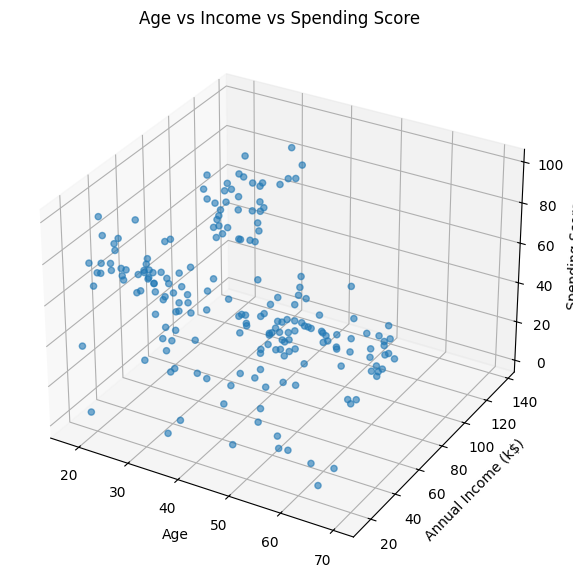

In [412]:
data_3d = df[['Age','Annual Income (k$)','Spending Score (1-100)']].to_numpy()

# 3D Scatter
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:,0], data_3d[:,1], data_3d[:,2], alpha=0.6)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score')
ax.set_title("Age vs Income vs Spending Score")
plt.show()


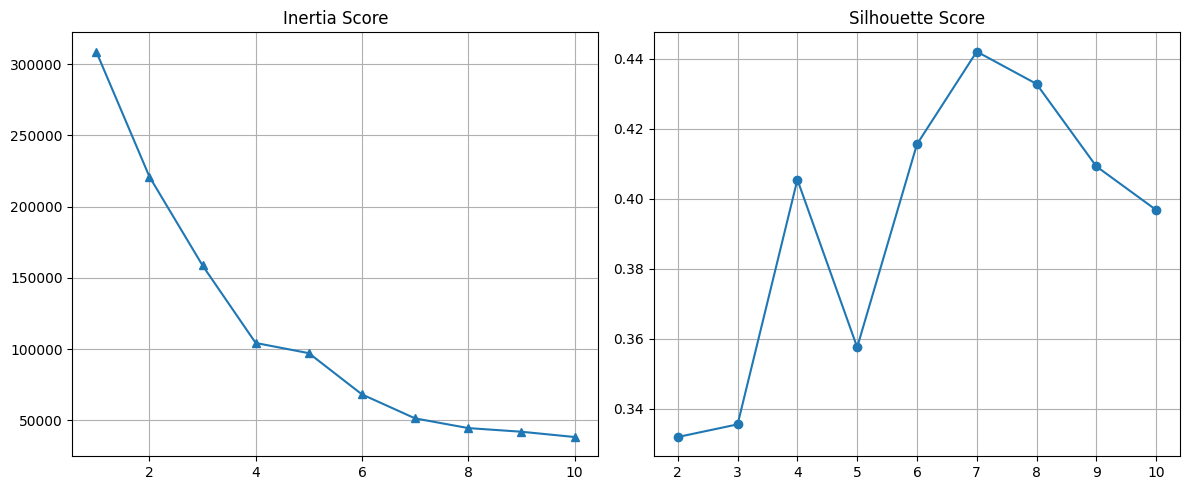

Elbow 3D = 4
Best Cluster 3D by Silhouette Score = 7


In [413]:
inertia_3d = []
silhouette_3d = []

for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_3d)
    inertia_3d.append(km.inertia_)
    if k > 1:
        silhouette_3d.append(silhouette_score(data_3d, km.labels_))

# Plot
fig, axs = plt.subplots(1,2, figsize=(12,5))
axs[0].plot(range(1,11), inertia_3d, marker='^')
axs[0].set_title("Inertia Score")
axs[0].grid(True)

axs[1].plot(range(2,11), silhouette_3d, marker='o')
axs[1].set_title("Silhouette Score")
axs[1].grid(True)

plt.tight_layout()
plt.show()

knee_3d = KneeLocator(range(1,11), inertia_3d, curve='convex', direction='decreasing')
print("Elbow 3D =", knee_3d.elbow)

best_silhouette_3d = list(zip(silhouette_3d, range(2,11)))
print("Best Cluster 3D by Silhouette Score =", best_silhouette_3d[silhouette_3d.index(max(silhouette_3d))][1])


**Result:**  
- Optimal number of clusters for 3D data: **4 to 7**



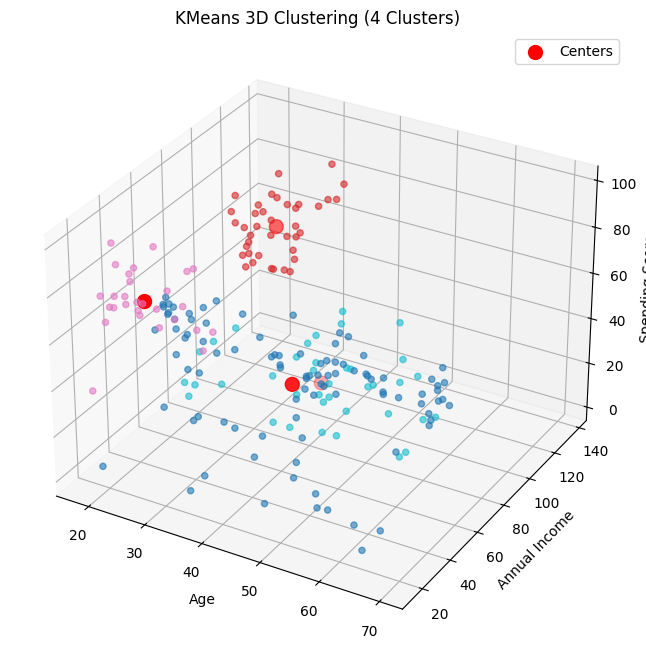


Cluster Profile (4 clusters):
                  Age  Annual Income (k$)  Spending Score (1-100)
Cluster_4                                                       
0          44.894737           48.705263               42.631579
1          32.692308           86.538462               82.128205
2          24.821429           28.714286               74.250000
3          40.394737           87.000000               18.631579


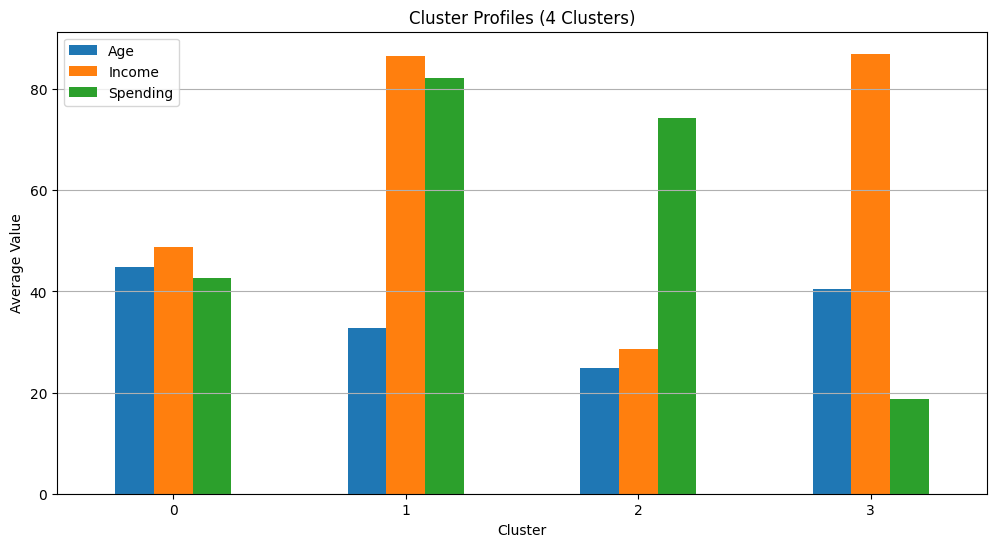

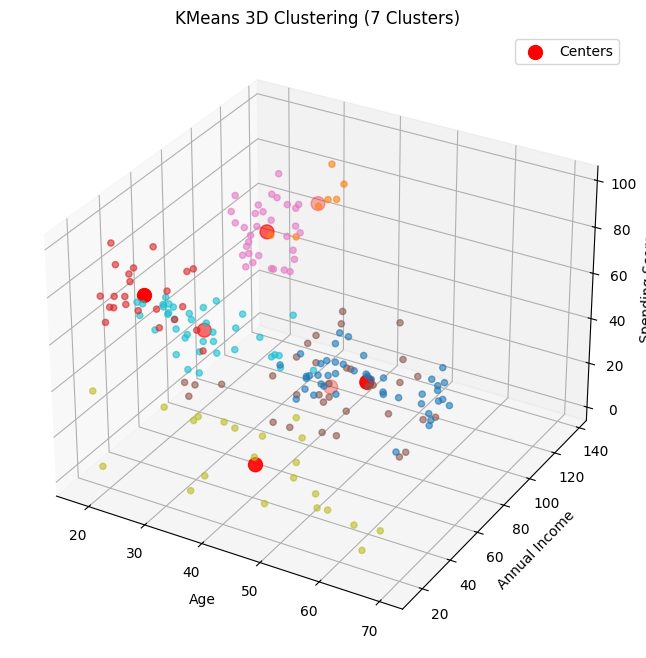


Cluster Profile (7 clusters):
                  Age  Annual Income (k$)  Spending Score (1-100)
Cluster_7                                                       
0          56.340909           53.704545               49.386364
1          33.000000          114.714286               78.428571
2          25.521739           26.304348               78.565217
3          41.647059           88.735294               16.764706
4          32.625000           80.375000               82.937500
5          44.318182           25.772727               20.272727
6          27.315789           57.500000               48.447368


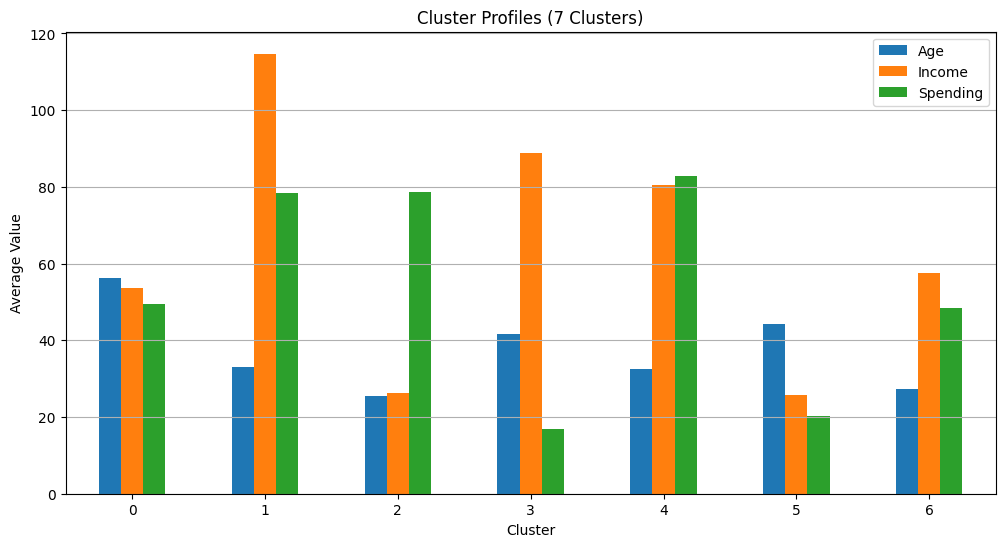

In [414]:
def plot_3d_clusters(data, n_clusters):
    km = KMeans(n_clusters=n_clusters, random_state=42)
    labels = km.fit_predict(data)
    df[f'Cluster_{n_clusters}'] = labels
    
    # 3D Plot
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(data[:,0], data[:,1], data[:,2], c=labels, cmap='tab10', alpha=0.6)
    ax.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], km.cluster_centers_[:,2], color='red', s=100, label='Centers')
    ax.set_xlabel('Age')
    ax.set_ylabel('Annual Income')
    ax.set_zlabel('Spending Score')
    ax.set_title(f"KMeans 3D Clustering ({n_clusters} Clusters)")
    ax.legend()
    plt.show()
    
    # Cluster Profile
    profile = df.groupby(f'Cluster_{n_clusters}')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()
    print(f"\nCluster Profile ({n_clusters} clusters):\n", profile)
    
    # Barplot
    profile.plot(kind='bar', figsize=(12,6))
    plt.title(f'Cluster Profiles ({n_clusters} Clusters)')
    plt.xlabel('Cluster')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.legend(['Age','Income','Spending'])
    plt.show()

    # 4 Clusters
plot_3d_clusters(data_3d, 4)

# 7 Clusters
plot_3d_clusters(data_3d, 7)



## Conclusion

In this analysis, we performed **customer segmentation** on the Mall Customers dataset using the **K-Means algorithm**.

### Key Findings

1. **2D Clustering (Annual Income vs Spending Score)**
   - Optimal number of clusters: **5**
   - Cluster interpretation:
     - **Cluster 0:** Average income, average spending
     - **Cluster 1:** High income, high spending (premium buyers)
     - **Cluster 2:** Low income, high spending (budget-active shoppers)
     - **Cluster 3:** High income, low spending (frugal segment)
     - **Cluster 4:** Above-average income, very high spending (key target segment)

2. **3D Clustering (Age, Annual Income, Spending Score)**
   - Optimal number of clusters: **4 to 7**
   - Cluster interpretation for **4 clusters**:
     - **Cluster 0:** Older customers, medium income, medium spending
     - **Cluster 1:** Young adults, high income, high spending
     - **Cluster 2:** Young, low income, high spending
     - **Cluster 3:** Middle-aged, medium income, low spending
   - Cluster interpretation for **7 clusters**:
     - **Cluster 0:** Older, medium income, medium spending
     - **Cluster 1:** Young adults, high income, high spending (premium buyers)
     - **Cluster 2:** Young, low income, high spending (budget-active shoppers)
     - **Cluster 3:** Middle-aged, high income, very low spending (frugal segment)
     - **Cluster 4:** Young, above-average income, very high spending (key target segment)
     - **Cluster 5:** Middle-aged, low income, low spending (price-sensitive segment)
     - **Cluster 6:** Young adults, medium income, medium spending (average buyers)

### Insights

- **3D clustering** reveals more detailed customer segments than 2D clustering.
- Identified clusters can guide **marketing strategies**, **personalized campaigns**, and **target customer identification**.
- Choosing the optimal **k** is critical and should be validated using both **Elbow** and **Silhouette methods**.

### Next Steps (Optional)

- Experiment with **other clustering algorithms** such as DBSCAN or Hierarchical Clustering.
- Include additional features like **Gender** or **Location** for more refined segmentation.
- Analyze **cluster stability over time** to track changes in customer behavior.
